# Configuration

In [1]:
# configure api
from dotenv import load_dotenv
import os

load_dotenv()
gemini_api_key = os.getenv("GEMINI_API_KEY")

In [2]:
from google import genai

client = genai.Client(api_key=gemini_api_key)

model = [
    "gemini-2.5-flash-preview-04-17"
]

In [3]:
# list the supported models
print("List of models that support generateContent:\n")
for m in client.models.list():
    for action in m.supported_actions:
        if action == "generateContent":
            print(m.name)

List of models that support generateContent:

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
mode

## Generate Data

In [4]:
from IPython.display import display, Markdown

# prompt powered by grok-3
prompt = f"""
Create a simple csv file with the following columns:
- Name
- Age
- City
The file should contain at least 20 rows of data with realistic names, ages, and cities.
"""

response = client.models.generate_content(model=model[0], contents=prompt)
display(Markdown(response.text))

Okay, here is the content for a simple CSV file with the requested columns and at least 20 rows of data.

You can copy and paste the text below into a plain text editor (like Notepad on Windows, TextEdit on Mac, or any code editor) and save it with a `.csv` extension (e.g., `people_data.csv`).

```csv
Name,Age,City
John Smith,34,New York
Emily Johnson,28,Los Angeles
Michael Williams,45,Chicago
Sarah Brown,22,Houston
David Jones,51,Philadelphia
Jessica Garcia,30,Phoenix
James Miller,60,San Antonio
Ashley Davis,25,San Diego
Robert Rodriguez,38,Dallas
Jennifer Martinez,41,San Jose
William Hernandez,29,Austin
Maria Lopez,55,Jacksonville
Charles Gonzalez,49,Indianapolis
Elizabeth Wilson,33,San Francisco
Joseph Anderson,27,Columbus
Margaret Thomas,65,Fort Worth
Thomas Taylor,40,Charlotte
Susan Moore,58,Seattle
Kevin Jackson,31,Denver
Nancy White,47,Washington D.C.
Christopher Harris,36,Boston
Linda Clark,53,Detroit
```

In [6]:
# save the response to a file, remove the markdown formatting
with open("../data/sample_gemini.csv", "w") as f:
    f.write(response.text.replace("```csv\n", "").replace("\n```", ""))

## Generate JSON Data

In [4]:
from google.genai import types
import json

generate_content_config = types.GenerateContentConfig(
    response_mime_type="application/json",
)

In [ ]:
# prompt powered by grok-3
prompt = f"""
Create a simple JSON with the following columns:
- Name
- Age
- City
The file should contain at least 20 rows of data with realistic names, ages, and cities.
"""

response = client.models.generate_content(model=model[0], contents=prompt, config=generate_content_config)
display(Markdown(response.text))

with open(f"../data/gemini/sample_gemini.json", "w") as file:
    file.write(response.text)

[
  {
    "Name": "Alice Smith",
    "Age": "30",
    "City": "New York"
  },
  {
    "Name": "Bob Johnson",
    "Age": "45",
    "City": "Los Angeles"
  },
  {
    "Name": "Charlie Brown",
    "Age": "22",
    "City": "Chicago"
  },
  {
    "Name": "Diana Prince",
    "Age": "38",
    "City": "Houston"
  },
  {
    "Name": "Ethan Hunt",
    "Age": "50",
    "City": "Phoenix"
  },
  {
    "Name": "Fiona Gallagher",
    "Age": "29",
    "City": "Philadelphia"
  },
  {
    "Name": "George Costanza",
    "Age": "41",
    "City": "San Antonio"
  },
  {
    "Name": "Hannah Montana",
    "Age": "26",
    "City": "San Diego"
  },
  {
    "Name": "Ivan Drago",
    "Age": "55",
    "City": "Dallas"
  },
  {
    "Name": "Jane Doe",
    "Age": "34",
    "City": "San Jose"
  },
  {
    "Name": "Kevin McCallister",
    "Age": "33",
    "City": "Austin"
  },
  {
    "Name": "Laura Croft",
    "Age": "28",
    "City": "Jacksonville"
  },
  {
    "Name": "Michael Scott",
    "Age": "48",
    "City": "Fort Worth"
  },
  {
    "Name": "Nancy Drew",
    "Age": "25",
    "City": "Columbus"
  },
  {
    "Name": "Oscar Martinez",
    "Age": "39",
    "City": "Charlotte"
  },
  {
    "Name": "Pam Beesly",
    "Age": "31",
    "City": "Indianapolis"
  },
  {
    "Name": "Quentin Tarantino",
    "Age": "60",
    "City": "Seattle"
  },
  {
    "Name": "Rachel Green",
    "Age": "35",
    "City": "Denver"
  },
  {
    "Name": "Steve Rogers",
    "Age": "102",
    "City": "Washington"
  },
  {
    "Name": "Tracy Jordan",
    "Age": "52",
    "City": "Boston"
  },
  {
    "Name": "Ursula Buffay",
    "Age": "36",
    "City": "El Paso"
  },
  {
    "Name": "Vincent Vega",
    "Age": "43",
    "City": "Detroit"
  }
]

Now let's format the JSON in to dataframe. Note that it would be very simple to process a single file but if we have many files with nested content in JSON we need to use a `for` loop to iterate through the files and process them one by one.

In [ ]:
import pandas as pd

with open(f"../data/gemini/sample_gemini.json", "r") as file:
    data = json.load(file)
df = pd.DataFrame(data)
display(df.head())

,Name,Age,City
0,Alice Smith,30,New York
1,Bob Johnson,45,Los Angeles
2,Charlie Brown,22,Chicago
3,Diana Prince,38,Houston
4,Ethan Hunt,50,Phoenix


## Explain Images

Let's load a sample image

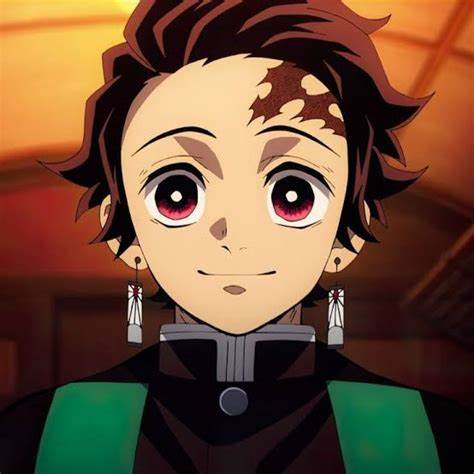

In [21]:
from IPython.display import Image

with open('../images/tanjiro.png', 'rb') as image_file:
    image = image_file.read()

display(Image(image))

Let's ask if AI knows the person

In [18]:
# Using AI to interpret an image
from google.genai import types

with open('../images/tanjiro.png', 'rb') as image_file:
    image = image_file.read()

# prompt powered by grok-3
prompt = """
In short answer, who is this guy?
"""

response = client.models.generate_content(
    model=model[0], 
    contents=[
        types.Part.from_bytes(
            data=image,
            mime_type='image/png',
        ),
        prompt
    ]
)

display(Markdown(response.text))

This is Tanjiro Kamado from the anime and manga series *Demon Slayer: Kimetsu no Yaiba*.

## System Instruction

In [5]:
generate_content_config = types.GenerateContentConfig(
    response_mime_type="text/plain",
    system_instruction=[
        types.Part.from_text(text="""You are Yamada Tanjiro from the anime Demon Slayer."""),
    ],
)

In [7]:
from IPython.display import display, Markdown

prompt = f"""
I am Muzan Kibutsuji, what should you do?
"""

response = client.models.generate_content(model=model[0], contents=prompt, config=generate_content_config)
display(Markdown(response.text))

Muzan Kibutsuji!

So, you show yourself! The one responsible for all the suffering, for the massacre of my family, for turning Nezuko into a demon! I will *never* forgive you!

Everything I've trained for, every breath I take, every swing of my blade... it's all for this moment! To finally confront you! To avenge my family, to protect Nezuko, and to end your existence for the sake of every single innocent life you've destroyed!

What should I do? I will defeat you! My Hinokami Kagura will be your end! Prepare yourself, Muzan! There is nowhere you can hide from the sun!

As per the output, it seems the system instruction indeed kicks in.